In [ ]:
import pandas as pd

%pip install wget

import wget
url = 'https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv'
wget.download(url, 'grades.csv')

df_students = pd.read_csv('grades.csv', delimiter=',', header='infer')

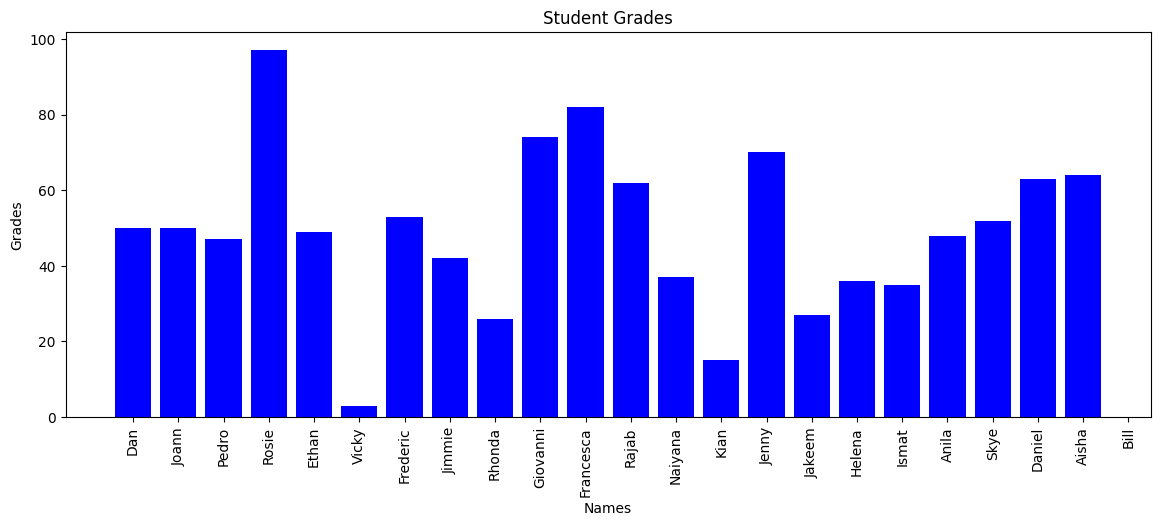

In [41]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(14, 5))

plt.bar(x=df_students.Name, height=df_students.Grade, color = 'blue')

plt.title('Student Grades')
plt.xlabel('Names')
plt.ylabel('Grades')
plt.xticks(rotation=90)

plt.show()

In [40]:
passed = pd.Series(df_students.Grade > 60)
df_students = pd.concat([df_students, passed.rename('Passed')], axis=1)

df_students

,Name,StudyHours,Grade,Passed,Passed
0,Dan,10.00,50.0,False,False
1,Joann,11.50,50.0,False,False
2,Pedro,9.00,47.0,False,False
3,Rosie,16.00,97.0,True,True
4,Ethan,9.25,49.0,False,False
5,Vicky,1.00,3.0,False,False
6,Frederic,11.50,53.0,False,False
7,Jimmie,9.00,42.0,False,False
8,Rhonda,8.50,26.0,False,False
9,Giovanni,14.50,74.0,True,True


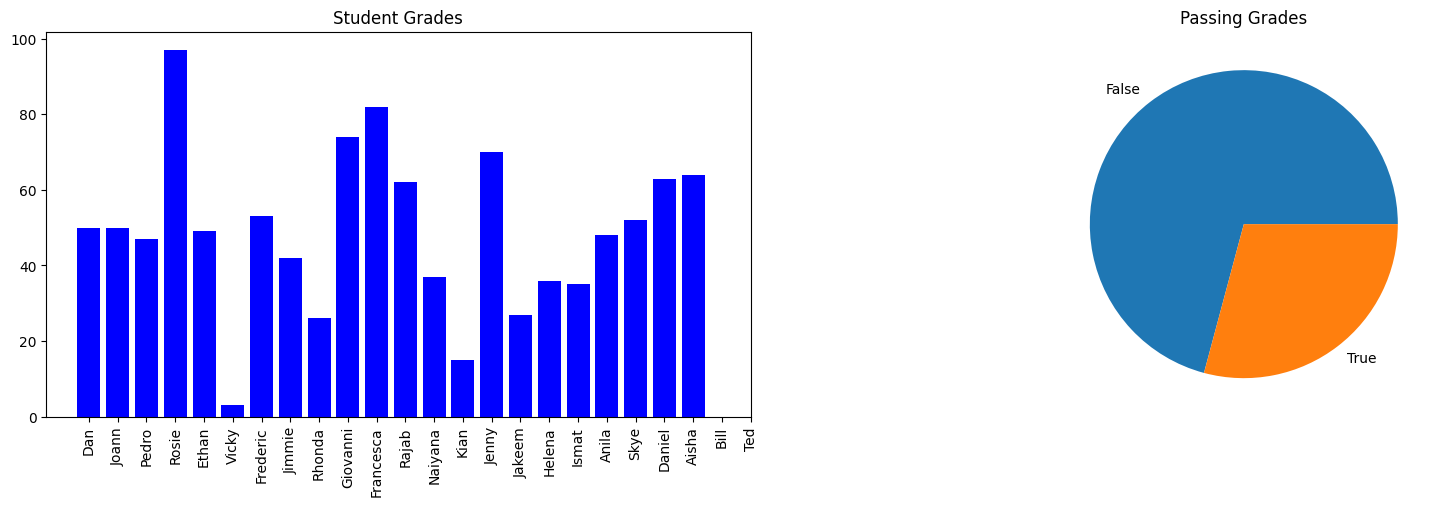

In [39]:
df_students = df_students.loc[:, ~df_students.columns.duplicated()]

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color = 'blue')
ax[0].set_title('Student Grades')
ax[0].set_xticks(range(len(df_students.Name)))
ax[0].set_xticklabels(df_students.Name, rotation=90)

passes_count = df_students.Passed.value_counts()
ax[1].pie(passes_count, labels=passes_count.index)
ax[1].set_title('Passing Grades')

plt.show()


<Axes: title={'center': 'Student Grades'}, xlabel='Name'>

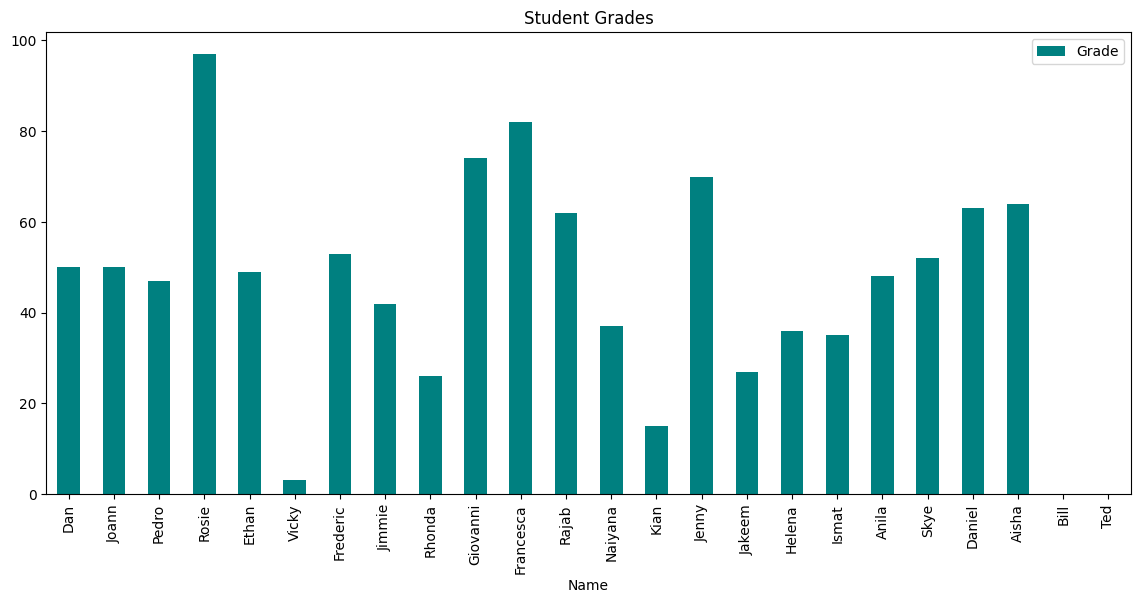

In [38]:
df_students.plot.bar(x='Name', y= 'Grade', figsize=(14, 6), color='teal', rot=90, title='Student Grades')

Min: 3.0, Max: 97.0, Mean: 49.18181818181818, Median: 49.5, Mode: 50.0


Text(0, 0.5, 'Frequency')

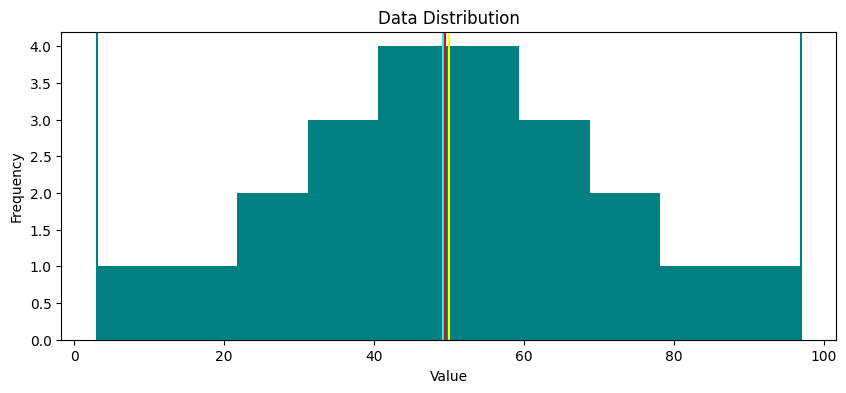

In [37]:
grades = df_students.Grade

min_value = df_students.Grade.min()
max_value = df_students.Grade.max() 
mean_value = df_students.Grade.mean()
median_value = df_students.Grade.median()   
mode_value = df_students.Grade.mode()[0]

print(f'Min: {min_value}, Max: {max_value}, Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}')

fig = plt.figure(figsize=(10, 4))

plt.hist(grades, color = 'teal')

plt.axvline(x=min_value, color='teal')
plt.axvline(x=max_value, color='teal')
plt.axvline(x=mean_value, color='cyan')
plt.axvline(x=median_value, color='red')
plt.axvline(x=mode_value, color='yellow')

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


/var/folders/0h/llh43wgj6k7czcwtttvv19900000gn/T/ipykernel_29979/3159615961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_students['Grade'] = pd.to_numeric(df_students['Grade'], errors='coerce')


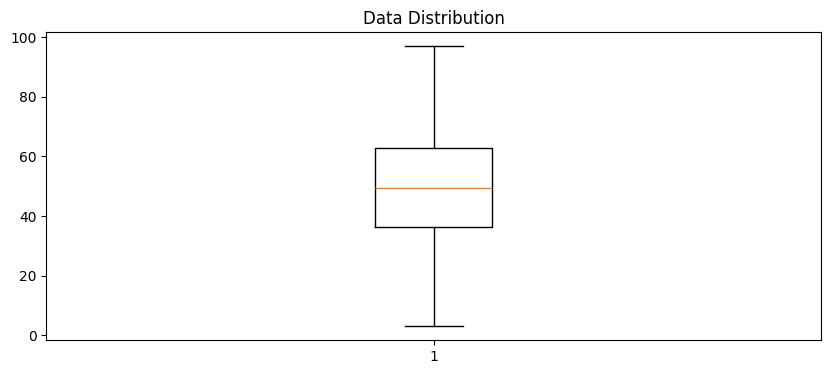

In [45]:
df_students['Grade'] = pd.to_numeric(df_students['Grade'], errors='coerce')

# We need to remove rows with missing grade values
df_students = df_students.dropna(subset=['Grade'])

grades = df_students.Grade

fig = plt.figure(figsize=(10, 4))
plt.boxplot(grades)
plt.title('Data Distribution')
plt.show()

Min: 3.0, Max: 97.0, Mean: 49.18181818181818, Median: 49.5, Mode: 50.0


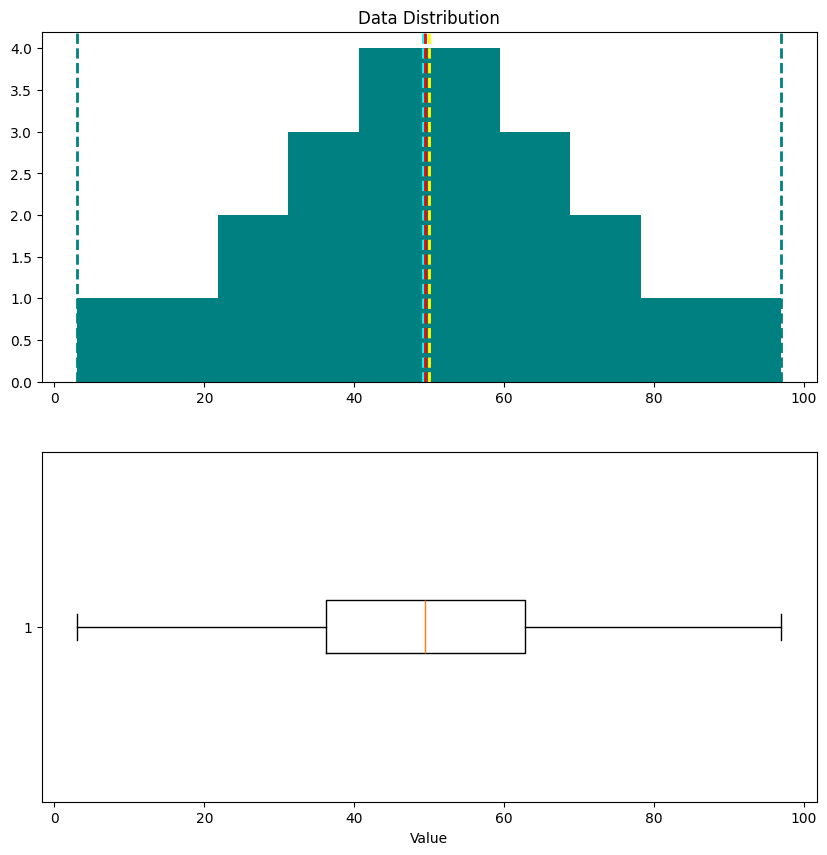

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df_students['Grade'] = pd.to_numeric(df_students['Grade'], errors='coerce')

df_students = df_students.dropna(subset=['Grade'])

def show_distribution(var_data):
    from matplotlib import pyplot as plt

    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()  
    median_val = var_data.median()
    mode_val = var_data.mode()[0]

    print(f'Min: {min_val}, Max: {max_val}, Mean: {mean_val}, Median: {median_val}, Mode: {mode_val}')

    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    ax[0].hist(var_data, color='teal')
    ax[0].axvline(x=min_val, color='teal', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=median_val, color='red', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=mode_val, color='yellow', linestyle='dashed', linewidth=2)
    ax[0].axvline(x=max_val, color='teal', linestyle='dashed', linewidth=2)
    
    ax[0].set_title('Data Distribution')

    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    plt.show()

show_distribution(df_students['Grade'])

Note: you may need to restart the kernel to use updated packages.


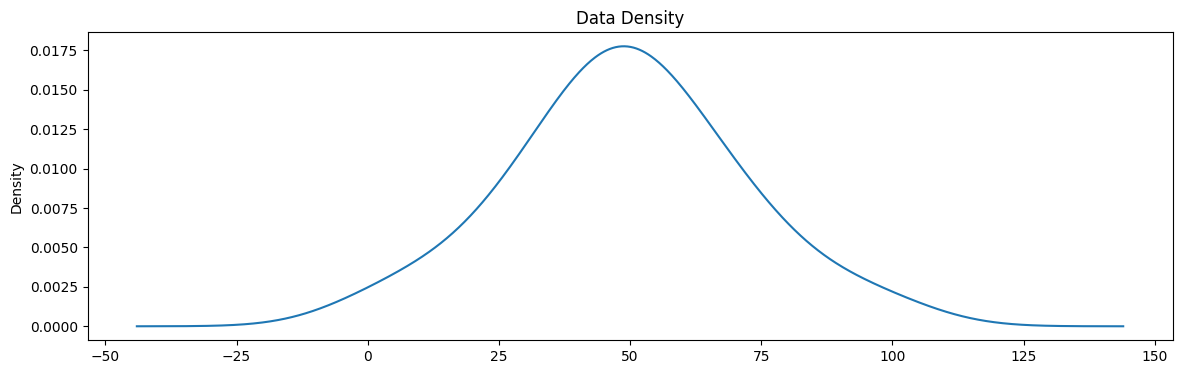

In [66]:
%pip install scipy

import pandas as pd
import matplotlib.pyplot as plt

def show_density(data):
    fig = plt.figure(figsize=(14, 4))

    data.plot.density()

    plt.title('Data Density')

    plt.show()
    
show_density(df_students['Grade'])